# STEP1 (IMPORT LIBRARIES)

Electric Utilities report a huge amount of information to government and public agencies. They include very granular data on fuel burned, electricity generated, power plant usage patterns, plant capacity factors and emissions from greenhouse gases. However, this data is not well documented and sometimes they are provided in a format that makes it difficult to understand.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data information


record_id : uniquenid given to identify each record
utility_id_ferc1 : id given by the Federal Energy Regulatory Commission to each utility(an organization supplying the community with electricity)
report_year : year the data was recorded
plant_name_ferc1 : name of plants.
fuel_type_code_pudl : type of fuel
fuel_unit : unit of fuel
fuel_qty_burned : the quantity of fuel burned for each record_id
fuel_mmbtu_per_unit : the energy released per unit of fuel burn
fuel_cost_per_unit_burned : the cost of fuel per unit fuel burning
fuel_cost_per_unit_delivered : the cost of fuel per unit fuel delivered(assuming fual delivered is equal to fuel burned)
fuel_cost_per_mmbtu : the cost of fuel for 1 unit of energy

# STEP2 (IMPORT DATAFRAME)

In [2]:
fuel_data=pd.read_csv("fuel_ferc1.csv")


# STEP3 

## print first 5 and last 5 datas 

In [3]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
fuel_data.tail()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


# STEP4

## get information about the data type and non-null values

In [5]:
fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


# STEP5

## "unique","top","freq" for categorical variables while others for numerical variables

In [6]:
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2009_12_27_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


# STEP6 (Removing NULL Values)

## Check for the NULL values if any

In [7]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

## Unique values in each columns

In [8]:
fuel_data.nunique(dropna=False)# dropna=false for not droping NAN value

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                          10
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11227
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12605
dtype: int64

## Cleaning NULL values


1.  droping  NAN
2. replacing NAN
    (As the NAN are in categorical variables so replacing with highest frequency variables)

## Let's make the copy of dataset to perform all operations possible

In [9]:
fuel_data_copy1=fuel_data.copy() #using copy function helps us to work on both dataset independently
fuel_data_copy2=fuel_data.copy()

1.Drop NAN

In [10]:
fuel_data_copy1.dropna(inplace=True)

In [11]:
fuel_data_copy1.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

2. Replace NAN with highest frequency value in same column

In [12]:
fuel_data_copy2.groupby("fuel_unit")["fuel_unit"].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

Let's fill NAN with "mcf" having highest frequency

In [13]:
fuel_data_copy2.fillna(value="mcf",inplace=True)

In [14]:
fuel_data_copy2.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

3. Replace NAN with highest frequency of fuel_unit wrt fuel type

In [15]:
fuel_data.groupby(["fuel_type_code_pudl","fuel_unit"]).size().reset_index(name="count")#size tells the value named as count


,fuel_type_code_pudl,fuel_unit,count
0,coal,bbl,1
1,coal,mcf,5
2,coal,mmbtu,52
3,coal,ton,8438
4,gas,bbl,2
5,gas,mcf,11333
6,gas,mmbtu,94
7,gas,ton,4
8,nuclear,gramsU,464
9,nuclear,kgU,110


In [16]:
fuel_data_copy2.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

## This replacing method is not working

In [17]:
#fuel_data[(fuel_data["fuel_type_code_pudl"]=="coal" )&(fuel_data["fuel_unit"]==np.nan)].replace(np.nan,'ton', inplace=True)
#fuel_data[(fuel_data["fuel_type_code_pudl"]=="gas" )&(fuel_data["fuel_unit"]==np.nan)].replace(np.nan,'mcf', inplace=True)
#fuel_data[(fuel_data["fuel_type_code_pudl"]=="nuclear" )&(fuel_data["fuel_unit"]==np.nan)].replace(np.nan,'gramsU', inplace=True)
#fuel_data[(fuel_data["fuel_type_code_pudl"]=="oil" )&(fuel_data["fuel_unit"]==np.nan)].replace(np.nan,'bbl', inplace=True)
#fuel_data[(fuel_data["fuel_type_code_pudl"]=="waste" )&(fuel_data["fuel_unit"]==np.nan)].replace(np.nan,'ton', inplace=True)
#fuel_data[(fuel_data["fuel_type_code_pudl"]=="other" )&(fuel_data["fuel_unit"]==np.nan)].replace(np.nan,'ton', inplace=True)

## Set_value function is working

Rows containing NULL values

In [18]:
Rows_NULL =fuel_data[fuel_data.isna().any(axis=1)]
Rows_NULL.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
66,f1_fuel_1994_12_9_3_13,9,1994,mickleton,oil,NaN,3547.0,5.606160,41.930,41.77,7.480
152,f1_fuel_1994_12_8_1_14,8,1994,ar nuclear one,nuclear,NaN,43461380.0,3.412600,1.654,0.00,0.485
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,NaN,2654942.0,0.100000,0.044,0.00,0.440
626,f1_fuel_1994_12_117_0_1,117,1994,nine mile unit 1,nuclear,NaN,401216.0,0.127467,78.446,0.00,0.615
627,f1_fuel_1994_12_117_0_4,117,1994,nine mile unit 2,nuclear,NaN,313736.0,0.119756,57.534,0.00,0.480


In [19]:
fuel_data.set_value(((fuel_data["fuel_type_code_pudl"]=="coal")&(fuel_data["fuel_unit"].isnull())), 'fuel_unit', "ton")
fuel_data.set_value(((fuel_data["fuel_type_code_pudl"]=="gas")&(fuel_data["fuel_unit"].isnull())), 'fuel_unit', "mcf")
fuel_data.set_value(((fuel_data["fuel_type_code_pudl"]=="nuclear")&(fuel_data["fuel_unit"].isnull())), 'fuel_unit', "gramsU")
fuel_data.set_value(((fuel_data["fuel_type_code_pudl"]=="oil")&(fuel_data["fuel_unit"].isnull())), 'fuel_unit', "bbl")
fuel_data.set_value(((fuel_data["fuel_type_code_pudl"]=="waste")&(fuel_data["fuel_unit"].isnull())), 'fuel_unit', "ton")
fuel_data.set_value(((fuel_data["fuel_type_code_pudl"]=="other")&(fuel_data["fuel_unit"].isnull())), 'fuel_unit', "ton")

C:\Users\neha\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Users\neha\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\neha\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\neha\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Us

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [20]:
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

66th row had NULL value not it is filled

In [21]:
fuel_data.iloc[66]

record_id                       f1_fuel_1994_12_9_3_13
utility_id_ferc1                                     9
report_year                                       1994
plant_name_ferc1                             mickleton
fuel_type_code_pudl                                oil
fuel_unit                                          bbl
fuel_qty_burned                                   3547
fuel_mmbtu_per_unit                            5.60616
fuel_cost_per_unit_burned                        41.93
fuel_cost_per_unit_delivered                     41.77
fuel_cost_per_mmbtu                               7.48
Name: 66, dtype: object

In [22]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


# STEP 7

In step 5 we can see negative values are lying in 25% data

<b> CODE </b>

fuel_data.sort_values('fuel_cost_per_unit_delivered', ascending=False, inplace=True).

fuel_data = fuel_data[fuel_data['fuel_cost_per_unit_delivered'].cumsum() / fuel_data['fuel_cost_per_unit_delivered'].sum() > 0.25]
this way we can drop first quarantile as these are only negative values.

<b>NOTE : </b> But in this case data is time series data so droping it is not a good idea

## Data Cleaning is done

# STEP 8

### Start data Analysing

In [23]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [24]:
fuel_data["total_energy"]=fuel_data["fuel_mmbtu_per_unit"]*fuel_data["fuel_qty_burned"]

In [25]:
#total fuel_cost
fuel_data["total_fuel_cost"]=(fuel_data["fuel_qty_burned"]*fuel_data["fuel_cost_per_unit_burned"])+(fuel_data["fuel_cost_per_mmbtu"]*fuel_data["total_energy"])+(fuel_data["fuel_cost_per_unit_delivered"]*fuel_data["fuel_qty_burned"])

In [26]:
fuel_data["total_cost_burned"]=fuel_data["fuel_qty_burned"]*fuel_data["fuel_cost_per_unit_burned"]
fuel_data["total_cost_energy"]=fuel_data["fuel_cost_per_mmbtu"]*fuel_data["total_energy"]
fuel_data["total_cost_delivered"]=fuel_data["fuel_cost_per_unit_delivered"]*fuel_data["fuel_qty_burned"]

Let's change name of the columns to make it simple

In [27]:
fuel_data=fuel_data.rename(columns={"report_year": "year", "plant_name_ferc1": "plant_name","fuel_type_code_pudl":"fuel_type"})

In [28]:
#fuel_data.head()

### Let's see how fuel quantity burned changed over time

In [29]:
fuel_trend=fuel_data[["year","fuel_type","fuel_unit","fuel_qty_burned"]]
fuel_trend.head()

,year,fuel_type,fuel_unit,fuel_qty_burned
0,1994,coal,ton,5377489.0
1,1994,coal,ton,10486945.0
2,1994,coal,ton,2978683.0
3,1994,coal,ton,3739484.0
4,1994,gas,mcf,40533.0


analyse type and unit


In [30]:
fuel_unit_count=fuel_trend.groupby(["fuel_type","fuel_unit"]).size().reset_index(name="count")
fuel_unit_count.head()

,fuel_type,fuel_unit,count
0,coal,bbl,1
1,coal,mcf,5
2,coal,mmbtu,52
3,coal,ton,8489
4,gas,bbl,2


In [31]:
fuel_unit_count=fuel_unit_count.pivot(index='fuel_type', columns='fuel_unit', values='count')
fuel_unit_count=fuel_unit_count.fillna(value=0)
fuel_unit_count.head()

fuel_unit,bbl,gal,gramsU,kgU,mcf,mmbtu,mwdth,mwhth,ton
fuel_type,,,,,,,,,
coal,1.0,0.0,0.0,0.0,5.0,52.0,0.0,0.0,8489.0
gas,2.0,0.0,0.0,0.0,11386.0,94.0,0.0,0.0,4.0
nuclear,0.0,0.0,479.0,110.0,0.0,34.0,95.0,100.0,0.0
oil,7973.0,81.0,0.0,0.0,7.0,0.0,0.0,0.0,3.0
other,42.0,3.0,0.0,0.0,9.0,0.0,0.0,0.0,113.0


Text(0, 0.5, 'Counts')

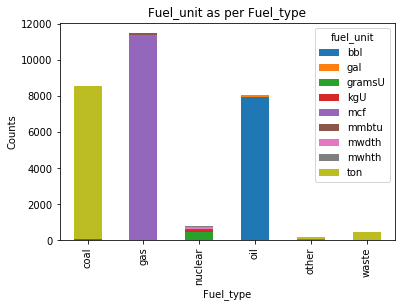

In [32]:
fuel_unit_count.plot(kind='bar', stacked=True)
plt.title("Fuel_unit as per Fuel_type")
plt.xlabel("Fuel_type")
plt.ylabel("Counts")

In [33]:
fuel_data_clean=fuel_data.copy()

In [34]:
fuel_data_clean_coal=fuel_data_clean[((fuel_data_clean["fuel_type"]=="coal")&(fuel_data_clean["fuel_unit"]=="ton") )]
fuel_data_clean_gas=fuel_data_clean[((fuel_data_clean["fuel_type"]=="gas")&(fuel_data_clean["fuel_unit"]=="mcf") )]
fuel_data_clean_nuc=fuel_data_clean[((fuel_data_clean["fuel_type"]=="nuclear")&(fuel_data_clean["fuel_unit"]=="gramsU") )]
fuel_data_clean_oil=fuel_data_clean[((fuel_data_clean["fuel_type"]=="oil")&(fuel_data_clean["fuel_unit"]=="bbl") )]
fuel_data_clean_oth=fuel_data_clean[((fuel_data_clean["fuel_type"]=="other")&(fuel_data_clean["fuel_unit"]=="ton") )]
fuel_data_clean_was=fuel_data_clean[((fuel_data_clean["fuel_type"]=="waste")&(fuel_data_clean["fuel_unit"]=="ton") )]

In [35]:
fuel_data_clean=[fuel_data_clean_coal,fuel_data_clean_gas,fuel_data_clean_nuc,fuel_data_clean_oil,fuel_data_clean_oth,fuel_data_clean_was]
fuel_data_clean = pd.concat(fuel_data_clean)
fuel_data_clean=fuel_data_clean.sort_values(by=['year'])

In [36]:
fuel_data_clean.head()

,record_id,utility_id_ferc1,year,plant_name,fuel_type,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_energy,total_fuel_cost,total_cost_burned,total_cost_energy,total_cost_delivered
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,8.921254e+07,2.996197e+08,99967520.51,1.000073e+08,99644871.17
642,f1_fuel_1994_12_151_0_8,151,1994,(1)sta98,gas,mcf,33044.0,1.031,3.50,3.50,3.399,3.406836e+04,3.471064e+05,115654.00,1.157984e+05,115654.00
638,f1_fuel_1994_12_150_2_8,150,1994,fredonia,gas,mcf,16670.0,1.035,3.44,3.44,3.320,1.725345e+04,1.719711e+05,57344.80,5.728145e+04,57344.80
637,f1_fuel_1994_12_150_1_14,150,1994,frederickson,gas,mcf,1448974.0,1.035,2.43,2.43,2.350,1.499688e+06,1.056628e+07,3521006.82,3.524267e+06,3521006.82
635,f1_fuel_1994_12_150_1_11,150,1994,whthorn 2&3,gas,mcf,8710.0,1.035,3.17,3.17,3.060,9.014850e+03,8.280684e+04,27610.70,2.758544e+04,27610.70


In [37]:
year_trend=fuel_data_clean[["year","fuel_type","fuel_qty_burned"]]
#year_trend.set_index("year").head()
year_trend=pd.pivot_table(year_trend, values='fuel_qty_burned', index="year",columns="fuel_type", aggfunc=np.sum)
year_trend.fillna(value=0).head()

fuel_type,coal,gas,nuclear,oil,other,waste
year,,,,,,
1994,7.159176e+08,2.432156e+09,77447163.0,1469716.0,2678556.0,1233131.0
1995,1.257398e+09,2.570668e+09,35243983.0,809178.0,417346358.0,1642051.0
1996,6.988514e+08,1.915166e+09,17091594.0,3637754.0,21985.0,1102632.0
1997,6.704709e+08,2.039837e+09,10377319.0,53849314.0,23040.0,1528774.0
1998,7.489611e+08,2.554413e+09,28482485.0,543608.0,5837656.0,1624599.0


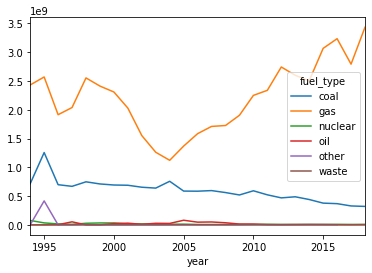

In [38]:
year_trend.plot()

## Answer: 
### electricity production using gas has increased over the time

In [39]:
fuel_energy=fuel_data[["fuel_type","fuel_mmbtu_per_unit"]]
#fuel_energy=fuel_energy[fuel_energy["year"]==1994]
fuel_energy

,fuel_type,fuel_mmbtu_per_unit
0,coal,16.590
1,coal,16.592
2,coal,24.130
3,coal,23.950
4,gas,1.000
...,...,...
29518,gas,1.059
29519,gas,1.050
29520,gas,1.060
29521,coal,16.108


Text(0.5, 0, 'Fuel type')

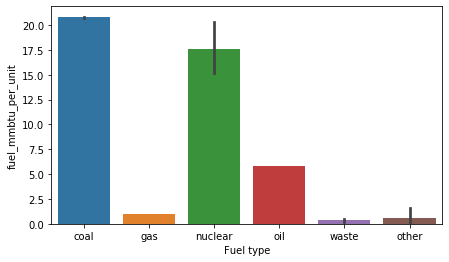

In [40]:
plt.figure(figsize=(7,4))
sns.barplot(data=fuel_energy, x='fuel_type', y='fuel_mmbtu_per_unit')
plt.xlabel('Fuel type')

## Answer : 
### nuclear plants generates highest energy

In [41]:
#Because of the extreme range of the values for the total energy, we can plot the barchart by taking the logarithm of the y-axis as follows:


#g = sns.barplot(data=fuel_energy, x='fuel_type', y='fuel_mmbtu_per_unit')
#g.set_yscale("log")
#g.set_ylim(1, 1200000000)
#plt.xlabel('Fuel type (log-log graph)')

In [42]:
fuel_cost=fuel_data[["fuel_type","fuel_cost_per_unit_burned"]]
fuel_cost.head()

,fuel_type,fuel_cost_per_unit_burned
0,coal,18.59
1,coal,18.58
2,coal,39.72
3,coal,47.21
4,gas,2.77


Text(0.5, 0, 'Fuel type')

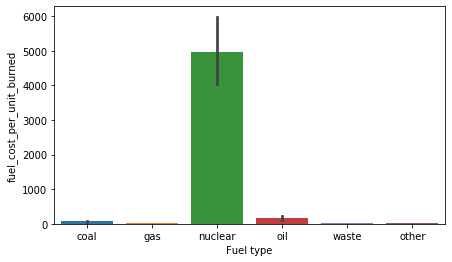

In [43]:
plt.figure(figsize=(7,4))
sns.barplot(data=fuel_cost, x='fuel_type', y='fuel_cost_per_unit_burned')
plt.xlabel('Fuel type')

Text(0.5, 0, 'Fuel type')

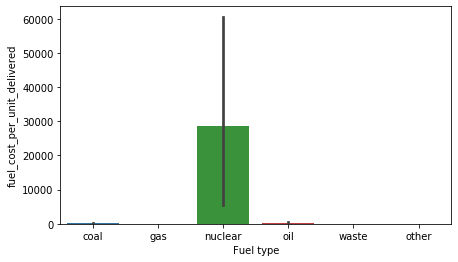

In [44]:
fuel_cost=fuel_data[["fuel_type","fuel_cost_per_unit_delivered"]]
fuel_cost.head()
plt.figure(figsize=(7,4))
sns.barplot(data=fuel_cost, x='fuel_type', y='fuel_cost_per_unit_delivered')
plt.xlabel('Fuel type')

Text(0.5, 0, 'Fuel type')

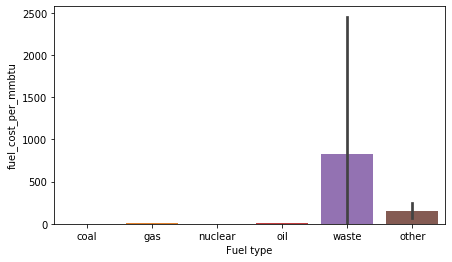

In [45]:
fuel_cost=fuel_data[["fuel_type","fuel_cost_per_mmbtu"]]
fuel_cost.head()
plt.figure(figsize=(7,4))
sns.barplot(data=fuel_cost, x='fuel_type', y='fuel_cost_per_mmbtu')
plt.xlabel('Fuel type')

In [46]:
#Because of the extreme range of the values for the total cost, we can plot the barchart by taking the logarithm of the y-axis as follows:


#g = sns.barplot(data=fuel_cost, x='fuel_type', y='total_fuel_cost')
#g.set_yscale("log")
#g.set_ylim(1, 10000000000)
#plt.xlabel('Fuel type (log-log graph)')

## Answer :
### despite of generating highest energy, nuclear power generation is not much used because it is highly expensive

In [96]:
All_cost=fuel_data[["fuel_type","fuel_cost_per_unit_burned","fuel_cost_per_unit_delivered","fuel_cost_per_mmbtu"]]
#All_cost.set_index("fuel_type",inplace=True)
All_cost.head()

,fuel_type,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,coal,18.59,18.53,1.121
1,coal,18.58,18.53,1.120
2,coal,39.72,38.12,1.650
3,coal,47.21,45.99,1.970
4,gas,2.77,2.77,2.570


In [97]:
a=All_cost.groupby(['fuel_type']).sum()
a
#All_cost.stack()


,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type,,,
coal,576254.381,9.995814e+05,15275.11517
gas,156891.829,1.389252e+05,62126.34574
nuclear,4053318.428,2.340864e+07,1404.14500
oil,1361824.819,2.531352e+06,102402.57762
other,3048.394,2.817538e+03,25899.18000
waste,8607.492,8.120156e+03,362815.08200


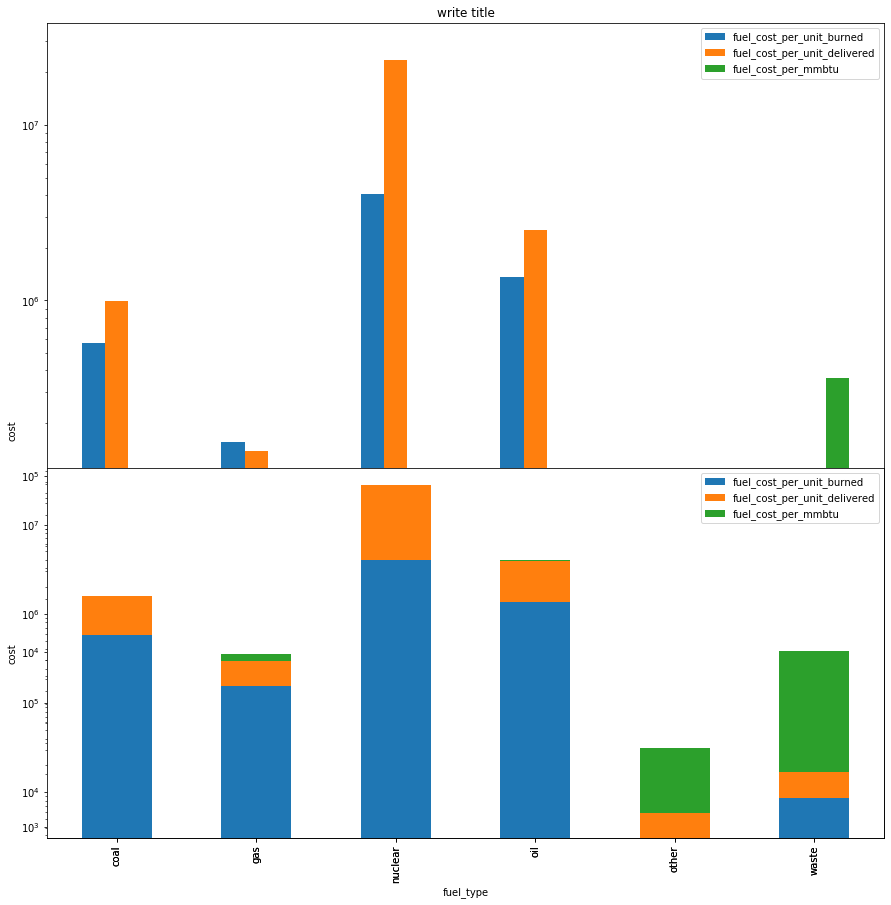

In [127]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 1, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
a.plot(kind='bar', figsize=(15, 15), logy=True, ax=ax0) # add to subplot 1
ax0.set_title('write title')
ax0.set_xlabel('fuel_type')
ax0.set_ylabel('cost')

# Subplot 2: Line plot
a.plot(kind='bar', figsize=(15, 15), logy=True,stacked=True, ax=ax1) # add to subplot 2
ax1.set_title ('')
ax1.set_ylabel('cost')
ax1.set_xlabel('')

plt.show()

In [95]:
#standardising columns
All_cost["total_cost_burned"]=(All_cost["total_cost_burned"]-All_cost["total_cost_burned"].mean())/(All_cost["total_cost_burned"].std())
All_cost["total_cost_energy"]=(All_cost["total_cost_energy"]-All_cost["total_cost_energy"].mean())/(All_cost["total_cost_energy"].std())
All_cost["total_cost_delivered"]=(All_cost["total_cost_delivered"]-All_cost["total_cost_delivered"].mean())/(All_cost["total_cost_delivered"].std())

C:\Users\neha\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\neha\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\neha\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [50]:
All_cost.describe()

,total_cost_burned,total_cost_energy,total_cost_delivered
count,2.952300e+04,2.952300e+04,2.952300e+04
mean,-6.738880e-18,2.214204e-17,-2.406743e-18
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.267679e-02,-1.991325e-01,-1.392099e-02
25%,-5.078167e-02,-1.974256e-01,-1.295585e-02
50%,-4.852543e-02,-1.809604e-01,-1.283434e-02
75%,-2.886532e-02,-2.117492e-02,-1.142415e-02
max,7.312522e+01,1.253742e+02,1.214232e+02


# Rough(below)

## set width of bar
barWidth = 0.25


# Set position of bar on X axis
r1 = np.arange(len(All_cost["total_cost_burned"]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, All_cost["total_cost_burned"], color='#7f6d5f', width=barWidth, edgecolor='white', label='total_cost_burned')
plt.bar(r2, All_cost["total_cost_energy"], color='#557f2d', width=barWidth, edgecolor='white', label='total_cost_energy')
plt.bar(r3, All_cost["total_cost_delivered"], color='#2d7f5e', width=barWidth, edgecolor='white', label='total_cost_delivered')
 
# Add xticks on the middle of the group bars
plt.xlabel('fuel type', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(All_cost["total_cost_burned"]))], ['coal', 'gas', 'nuclear', 'oil', 'other','waste'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


### Q. How to assign groupby to dataframe?
### Q. sidebyside stacked bar graph

#All_cost.groupby(['fuel_type']).mean()
#All_cost.head()
#All_cost.stack()
#All_cost.groupby(['fuel_type', 'cost'])['values'].mean().unstack().plot.bar()